In [21]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy
from tqdm import tqdm

In [22]:
class Robot:
    
    def __init__(self,dt,Id=0):
        
        self.Id = Id
        self.dt = dt
        
        self.r = np.array([0.,0.])
        
        theta = np.random.uniform(0.,2*np.pi)
        self.v = np.array([1.*np.cos(theta),1.*np.sin(theta)]) 
        
    def Evolution(self):
        
        self.r += self.v*self.dt

In [23]:
r1 = Robot(0.5)

In [24]:
r1.Evolution()
r1.r

array([0.32339844, 0.38133115])

In [35]:
dt = 0.05
t = np.arange(0.,1.,dt)

In [36]:
def GetRobots(N):
    
    Robots = []
    
    for i in range(N):
        r = Robot(dt,Id=i)
        Robots.append(r)
        
    return Robots

In [37]:
def Plotter(t):
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    
    ax.set_title('t = {:.2f}'.format(t))
    
    return ax

In [38]:
def TimeEvolution(Robots,t):
    
    for it in range(t.shape[0]):
        
        # Actualizamos
        for i,p in enumerate(Robots):
            p.Evolution()
        
        clear_output(wait=True)
        
        ax = Plotter(t[it])
            
        for i,p in enumerate(Robots):         
            ax.scatter(p.r[0],p.r[1],label='Id {} s'.format(p.Id))
            ax.quiver(p.r[0],p.r[1],p.v[0],p.v[1])
       
        ax.legend(loc='upper center', ncol=1, bbox_to_anchor=(1.2,0.9),frameon=False,fontsize=10)
        
        plt.show()
        
        time.sleep(0.005)

In [39]:
Robots = GetRobots(10)

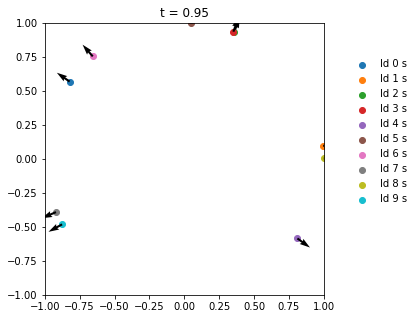

In [40]:
TimeEvolution(Robots,t)